# Break picture into multiple parts for printing (with optional common margin)

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

def create_sub_pic(img,no_of_sub_pics,margin=0.01,save_sub_parts=False): #takes a picture to break it into sub parts with margins
    global j
    h,l,d=img.shape
    if math.log(no_of_sub_pics,2)%2 == 0:
        if no_of_sub_pics != 1:
            h = int(h//2+round(margin*h,0))
            l = int(l//2+round(margin*l,0))
            create_sub_pic(img[:h,:l,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            create_sub_pic(img[:h,-l:,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            create_sub_pic(img[-h:,:l,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
            create_sub_pic(img[-h:,-l:,:],no_of_sub_pics//4,save_sub_parts=save_sub_parts)
        else:
            if save_sub_parts:
                mpimg.imsave(output_path+img_name+'_part'+str(j+1)+'.jpg',img)
            else:
                if j+1==8:
                    print('Sub pic shape:',img.shape)
                    plt.imshow(img)
            j+=1
            
    else:
        if h > l: #break the picture on the longer axis
            h = int(h//2+int(margin*h))
            create_sub_pic(img[:h,:,:],no_of_sub_pics//2,save_sub_parts=save_sub_parts)
            create_sub_pic(img[-h:,:,:],no_of_sub_pics//2,save_sub_parts=save_sub_parts)
        else:
            l = int(l//2+int(margin*l))
            create_sub_pic(img[:,:l,:],no_of_sub_pics//2,save_sub_parts=save_sub_parts)
            create_sub_pic(img[:,-l:,:],no_of_sub_pics//2,save_sub_parts=save_sub_parts)

In [2]:
# !dir C:\Users\Surya\Pictures\Wall Poster
!dir C:\Users\Surya\Pictures\GitHub\print_in_A4\WallPoster

 Volume in drive C has no label.
 Volume Serial Number is 5C53-8C7E

 Directory of C:\Users\Surya\Pictures\GitHub\print_in_A4\WallPoster

11/14/2018  09:29 AM    <DIR>          .
11/14/2018  09:29 AM    <DIR>          ..
10/21/2018  11:14 PM           200,729 2%midset 2.jpg
11/14/2018  09:29 AM           617,701 7 habits.jpg
10/21/2018  11:38 PM            53,842 Boxer Stamina.jpg
10/22/2018  10:58 AM         1,036,340 Color Wheel.jpg
10/21/2018  11:43 PM            22,130 Eye exercise.jpg
09/18/2018  09:32 AM           288,115 HB.jpg
10/21/2018  11:11 PM         3,871,992 Learn Create Sleep.jpg
10/21/2018  11:30 PM            61,354 Morning Workout.jpg
09/18/2018  09:28 AM         2,640,016 TD.png
09/17/2018  10:57 PM            88,565 The cove.jpg
10/22/2018  11:00 AM    <DIR>          ToPrint
              10 File(s)      8,880,784 bytes
               3 Dir(s)  15,723,008,000 bytes free


In [3]:
#Print multiple sections
img_name = '7 habits'
img_path = "C:\\Users\\Surya\\Pictures\\GitHub\print_in_A4\\WallPoster\\"+img_name+".jpg"
output_path = "C:\\Users\\Surya\\Pictures\\GitHub\\print_in_A4\\WallPoster\\ToPrint\\"
no_of_sub_pics = 4

img = mpimg.imread(img_path)
h,l,d=img.shape
print('Image shape:',(h,l,d))
print('Recommended parts:',int(math.pow(2,math.log(h*l//(400*250),2)//1)))
global j;j=0
create_sub_pic(img,no_of_sub_pics,margin=0.01,save_sub_parts=True)

Image shape: (1706, 1200, 3)
Recommended parts: 16


In [4]:
mpimg.imread('C:\\Users\\Surya\\Pictures\\GitHub\print_in_A4\\WallPoster\\TD.png').shape

(1896, 1280, 3)

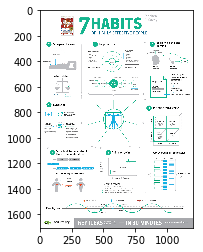

In [5]:
plt.imshow(img)